## Linear Regression Assignment

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problem 1 - Import and store the data in a data frame

In [2]:
# Import airline data
air_df = pd.read_csv("airline.csv")
air_df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


### Problem 2 - Remove the outliers from the data

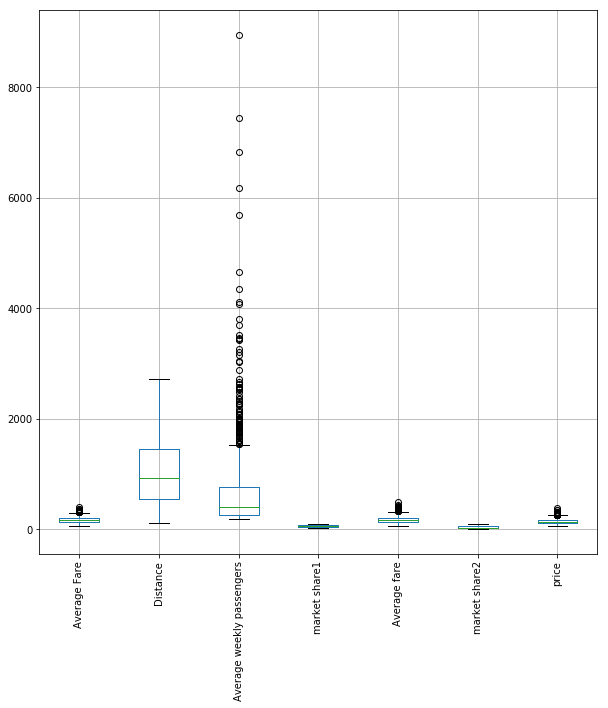

In [3]:
# Lets see the boxplot

boxplot = air_df.boxplot(rot=90, figsize=(10,10), fontsize=10)

In [4]:
# Get IQR
Q1 = air_df.quantile(0.25)
Q3 = air_df.quantile(0.75)
IQR = Q3 - Q1

# Get Median 
median = air_df.quantile(0.50)

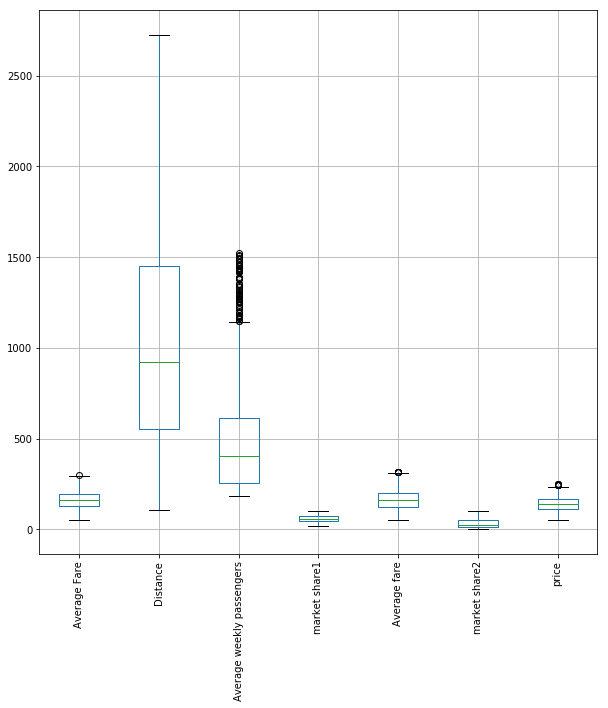

In [5]:
# Replace Outlier data with median

air_df = air_df.mask(((air_df < (Q1 - 1.5 * IQR)) | (air_df > (Q3 + 1.5 * IQR))), median, axis=1)
boxplot = air_df.boxplot(rot=90, figsize=(10,10), fontsize=10)

In [6]:
# Check if there are any NA values
air_df.isna().sum()

City1                        0
City2                        0
Average Fare                 0
Distance                     0
Average weekly passengers    0
market leading airline       0
market share1                0
Average fare                 0
Low price airline            0
market share2                0
price                        0
dtype: int64

In [7]:
# Do One Hot Encoding for the categorical columns using dummies
air_df = pd.get_dummies(air_df, columns=['City1', 'City2', 'market leading airline', 'Low price airline'], drop_first=True)
air_df.head()
# Do Label Encoding for categorical columns
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#le.fit(air_df['City1'])
#list(le.classes_)
#le.transform(air_df['City1'])

,Average Fare,Distance,Average weekly passengers,market share1,Average fare,market share2,price,City1_ACY,City1_ALB,City1_AMA,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,214.42,852,215.76,78.89,223.98,2.77,167.12,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,69.40,288,606.84,96.97,68.86,96.97,68.86,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,158.13,723,313.04,39.79,161.36,15.34,145.42,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Problem 3 - Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable

In [8]:
# Separate into Features X and Target Variable Y
# Independent Variables (Features)
X = air_df.loc[:, air_df.columns != 'Average Fare']
X.head()

,Distance,Average weekly passengers,market share1,Average fare,market share2,price,City1_ACY,City1_ALB,City1_AMA,City1_ATL,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,528,424.56,70.19,111.03,70.19,111.03,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,860,276.84,75.10,123.09,17.23,118.94,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,852,215.76,78.89,223.98,2.77,167.12,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,288,606.84,96.97,68.86,96.97,68.86,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,723,313.04,39.79,161.36,15.34,145.42,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# Dependent Variable (Target)
Y = air_df[["Average Fare"]]
Y.head()

,Average Fare
0,114.47
1,122.47
2,214.42
3,69.40
4,158.13


### Problem 4 - Drop the independent variables which has less than 0.1 correlation with the dependent variable 

In [10]:
# Calculate correlation
corr = air_df.corr().abs()

# Get columns with correlation less than 0.1 with Average Fare
to_drop = [column for column in corr.columns if (corr['Average Fare'][column] < 0.1)]
corr['Average Fare'][to_drop].head(10)

City1_ACY    0.043768
City1_ALB    0.022436
City1_AMA    0.055271
City1_ATL    0.041206
City1_AUS    0.011258
City1_BDL    0.007071
City1_BHM    0.039883
City1_BNA    0.018307
City1_BTV    0.042014
City1_BUF    0.037208
Name: Average Fare, dtype: float64

In [11]:
# Drop columns from feature X
X = X.drop(X[to_drop], axis=1)
X.columns

Index(['Distance', 'Average weekly passengers', 'market share1',
       'Average fare', 'market share2', 'price', 'City1_BOI', 'City1_BOS',
       'City1_CLT', 'City1_CVG', 'City1_DFW', 'City1_LAS', 'City1_MSP',
       'City1_OAK', 'City1_PHL', 'City2_GEG', 'City2_IAD', 'City2_MSP',
       'City2_RNO', 'City2_SFO', 'market leading airline_AS',
       'market leading airline_CO', 'market leading airline_FL',
       'market leading airline_NW', 'market leading airline_UA',
       'market leading airline_US', 'market leading airline_WN',
       'Low price airline_FL', 'Low price airline_UA', 'Low price airline_US',
       'Low price airline_WN'],
      dtype='object')

### Problem 5 - Create scatter Plot of Independent Variable vs Dependent Variable.

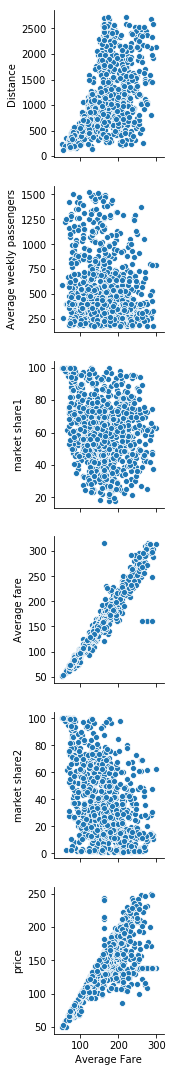

In [12]:
# Using just the original numerical variables. (Excluding the One Hot Encoded Variables)
pp = sns.pairplot(data=air_df,
                  x_vars=['Average Fare'],
                  y_vars=['Distance', 'Average weekly passengers', 'market share1', 'Average fare', 'market share2', 'price'])

### Problem 6 - Divide the data set into training and test data set and build a Multiple Linear Regression model.

In [13]:
# Split data to train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [14]:
#Print Shape of Train Sets
print(x_train.shape)

(800, 31)


In [15]:
# Print Shape of Test Set
print(x_test.shape)

(200, 31)


In [16]:
# Implement Linear Regression for train set and get coef and intercept
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Problem 7 - Print the coefficients & intercepts of the linear regression model

In [17]:
# Print the coefficients
model_coef = pd.DataFrame(data = model.coef_, columns=list(X.columns.values), index=['Coefficient'])
model_coef

,Distance,Average weekly passengers,market share1,Average fare,market share2,price,City1_BOI,City1_BOS,City1_CLT,City1_CVG,...,market leading airline_CO,market leading airline_FL,market leading airline_NW,market leading airline_UA,market leading airline_US,market leading airline_WN,Low price airline_FL,Low price airline_UA,Low price airline_US,Low price airline_WN
Coefficient,0.002976,-0.003386,0.036552,0.756861,-0.003806,0.184757,-2.504616,-1.966308,1.974766,5.314347,...,-2.642743,0.450579,-1.407277,-6.396881,0.177176,-1.226067,-3.040289,1.336056,2.166731,-0.177632


In [18]:
# Print Intercept
model.intercept_[0]

8.77221721920742

### Problem 8 - Print the accuracy of the overall model

In [19]:
# Train Score
from sklearn import metrics
train_R2 = model.score(x_train, y_train)
print("Train accuracy is %2.2f" %(train_R2*100) ,"%")
train_R2

Train accuracy is 95.56 %


0.9555751392557328

In [20]:
# Test Score
test_R2 = model.score(x_test, y_test)
print("Test accuracy is %2.2f" %(test_R2*100), "%")
test_R2

Test accuracy is 95.68 %


0.9568415211924701

#### Note: Built the model with out encoding categorical columns with just the numerical columns and recieved a similar accuracy.